In [1]:
import  numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('diabetes_data_upload.csv.xls')
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


#### DATA PREPROCESSING

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [3]:
data.isnull().values.any() # evaluating whether any value is missing in dataset

False

In [4]:
# Converting strings into numerics
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Polyuria'] = data['Polyuria'].map({'Yes': 1, 'No': 0})
data['Polydipsia'] = data['Polydipsia'].map({'Yes': 1, 'No': 0})
data['sudden weight loss'] = data['sudden weight loss'].map({'Yes': 1, 'No': 0})
data['weakness'] = data['weakness'].map({'Yes': 1, 'No': 0})
data['Polyphagia'] = data['Polyphagia'].map({'Yes': 1, 'No': 0})
data['Genital thrush'] = data['Genital thrush'].map({'Yes': 1, 'No': 0})
data['visual blurring'] = data['visual blurring'].map({'Yes': 1, 'No': 0})
data['Itching'] = data['Itching'].map({'Yes': 1, 'No': 0})
data['Irritability'] = data['Irritability'].map({'Yes': 1, 'No': 0})
data['delayed healing'] = data['delayed healing'].map({'Yes': 1, 'No': 0})
data['partial paresis'] = data['partial paresis'].map({'Yes': 1, 'No': 0})
data['muscle stiffness'] = data['muscle stiffness'].map({'Yes': 1, 'No': 0})
data['Alopecia'] = data['Alopecia'].map({'Yes': 1, 'No': 0})
data['Obesity'] = data['Obesity'].map({'Yes': 1, 'No': 0})
data['class'] = data['class'].map({'Positive': 1, 'Negative': 0})
data.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


#### FEATURE SELECTION AND SPLITTING THE DATA 

In [5]:
y=data["class"]
X=data.drop("class", axis=1)
#feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X,y)
# standardisation 
scaler=StandardScaler()
# Split dataset into training set and test set
X_scaled = scaler.fit_transform(X_new)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)


#### LOGISTIC REGRESSION

In [6]:
def tune_LR(X_train, y_train):
    # Define hyperparameter grid
    param_grid = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2", "elasticnet", "none"], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

    model = LogisticRegression()
    cv = KFold(n_splits=5, random_state=2, shuffle=True)
    grid = GridSearchCV(model, param_grid, cv=cv)

    grid.fit(X_train, y_train)

    # Return the best parameters 
    return grid.best_params_

LR_best_params = tune_LR(X_train, y_train)
print(LR_best_params)



{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [7]:
# Create and fit the model with the best parameters
model = LogisticRegression(**LR_best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
LR_y_pred = model.predict(X_test)

In [8]:
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
logreg_acc = metrics.accuracy_score(y_test, LR_y_pred)
print("Accuracy of LR :",metrics.accuracy_score(y_test, LR_y_pred))
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, LR_y_pred).ravel()
# Model Specificity: true negative rate
specificity = tn/(tn + fp)
print('Specificity of LR : ', specificity)
# Model Sensitivity: true positive rate
sensitivity = tp/(tp + fn)
print('sensitivity of LR : ', sensitivity)

Accuracy of LR : 0.8557692307692307
Specificity of LR :  0.8484848484848485
sensitivity of LR :  0.8591549295774648


#### KNN

In [9]:
def tune_KNN(X_train, y_train):
    # Define hyperparameter grid
    param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

    model = KNeighborsClassifier()
    cv = KFold(n_splits=5, random_state=2, shuffle=True)
    grid = GridSearchCV(model, param_grid, cv=cv, scoring="accuracy")
    grid.fit(X_train, y_train)

    # Return the best parameters 
    return grid.best_params_

KNN_best_params = tune_KNN(X_train, y_train)
print(KNN_best_params)


{'n_neighbors': 1}


In [10]:
# Create and fit the model with the best parameters
model = KNeighborsClassifier(**KNN_best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
KNN_y_pred = model.predict(X_test)


In [11]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy of KNN :",metrics.accuracy_score(y_test, KNN_y_pred))
KNN_acc = metrics.accuracy_score(y_test, KNN_y_pred)
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, KNN_y_pred).ravel()
# Model Specificity: true negative rate
specificity = tn/(tn + fp)
print('Specificity of KNN : ', specificity)
# Model Sensitivity: true positive rate
sensitivity = tp/(tp + fn)
print('sensitivity of KNN : ', sensitivity)

Accuracy of KNN : 0.9134615384615384
Specificity of KNN :  0.8787878787878788
sensitivity of KNN :  0.9295774647887324


#### NAIVE BAYES CLASSIFIER

In [12]:
def tune_NB(X_train, y_train):
    # Define hyperparameter grid
    param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

    model = GaussianNB()
    cv = KFold(n_splits=5)
    grid = GridSearchCV(model, param_grid, cv=cv, return_train_score=False,verbose=1)
    grid.fit(X_train, y_train)

    # Return the best parameters 
    return grid.best_params_

NB_best_params = tune_NB(X_train, y_train)
print(NB_best_params)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'var_smoothing': 1e-09}


In [13]:
model = GaussianNB(**NB_best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
NB_y_pred = model.predict(X_test)


In [14]:
print("Accuracy of NB :",metrics.accuracy_score(y_test, NB_y_pred))
NB_acc = metrics.accuracy_score(y_test, NB_y_pred)
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, NB_y_pred).ravel()
# Model Specificity: true negative rate
specificity = tn/(tn + fp)
print('Specificity of NB : ', specificity)
# Model Sensitivity: true positive rate
sensitivity = tp/(tp + fn)
print('sensitivity of NB : ', sensitivity)

Accuracy of NB : 0.8653846153846154
Specificity of NB :  0.8484848484848485
sensitivity of NB :  0.8732394366197183


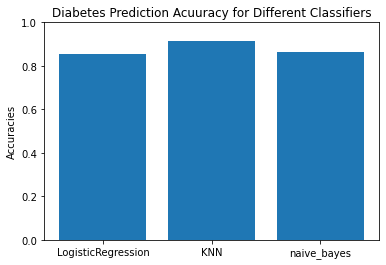

In [15]:
classifiers = ['LogisticRegression', 'KNN', 'naive_bayes']
accuracies = [logreg_acc, KNN_acc, NB_acc]

plt.bar(classifiers, accuracies)
plt.ylim([0,1])
plt.ylabel('Accuracies')
plt.title('Diabetes Prediction Acuuracy for Different Classifiers')
plt.show()